<a href="https://colab.research.google.com/github/baa5234/Data-602-Assignments/blob/main/Assignment_8_DATA_602_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Blessing Anoroh
# DATA 602
# Assignment 8

"""
<font size="10">
Using Assignment 7 to create plots for Assignment 8 (matplotlib and seaborn) Scroll down to visible charts.
</font>
"""

"""
Part 1:
Using matplotlib, create two or more plots that incorporate at least 5 of the following properties:

Note: these properties vary based on your data. The goal is to practice creating visualizations and modifying its properties.

Use and change a legend position
Change a legend font size
Place a legend outside of the plot
Create a single legend for all subplots
Change the title and x/y labels
Change the marker, line colors, and line width
Add annotations
Modify Axis Text Ticks/Labels
Change size of axis Labels
Your own choice not included above
Plots that you can create include:

Scatter Plot
Bar plot
Line Chart
Multi Plots (e.g. using .subplot()
Histogram
You can add another plot not listed here if it works better for your data. This is not a complete list of plots to create.

Part 2:
Recreate the visualizations above using the Seaborn library as best as possible.

You are required to explain what each of your plots is representing. Plots without comments will not be accepted. In addition, please explain the properties you are showcasing.
"""

'''

Overview:


We will be analyzing housing sales prices in the Bronx for the year 2023. Analyzing housing sales prices in Bronx, New York,
holds a particular significance due to its unique characteristics and position within the broader New York City real estate market.
As one of the five boroughs of New York City, Bronx exhibits a diverse mix of residential properties ranging from
single-family homes to multifamily buildings and condominiums. Historically, Bronx has experienced fluctuations in its housing market,
influenced by factors such as urban renewal initiatives, demographic shifts, and economic development projects.
Analyzing housing sales prices in the Bronx can provide insights into the affordability of housing, neighborhood dynamics,
gentrification trends, and the impact of urban revitalization efforts.
Moreover, understanding the housing market in Bronx can contribute to efforts aimed at promoting equitable development,
addressing housing disparities, and enhancing the overall quality of life for residents.

'''

'\n\nOverview:\n\n\nWe will be analyzing housing sales prices in the Bronx for the year 2023. Analyzing housing sales prices in Bronx, New York,\nholds a particular significance due to its unique characteristics and position within the broader New York City real estate market.\nAs one of the five boroughs of New York City, Bronx exhibits a diverse mix of residential properties ranging from\nsingle-family homes to multifamily buildings and condominiums. Historically, Bronx has experienced fluctuations in its housing market,\ninfluenced by factors such as urban renewal initiatives, demographic shifts, and economic development projects.\nAnalyzing housing sales prices in the Bronx can provide insights into the affordability of housing, neighborhood dynamics,\ngentrification trends, and the impact of urban revitalization efforts.\nMoreover, understanding the housing market in Bronx can contribute to efforts aimed at promoting equitable development,\naddressing housing disparities, and enha

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
url = "https://raw.githubusercontent.com/baa5234/FinalProject/main/2023_bronx%20(1).csv"
bronx_p_2023 = pd.read_csv(url)

print(bronx_p_2023.columns)



Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS',
       'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS\nAT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [34]:

# Dropping the specified columns
columns_to_drop = [
    'BOROUGH',
    'TAX CLASS AT PRESENT',
    'BLOCK',
    'LOT',
    'EASE-MENT',
    'BUILDING CLASS AT PRESENT',
    'ADDRESS',
    'APARTMENT NUMBER',
    'ZIP CODE',
    'RESIDENTIAL\nUNITS',
    'COMMERCIAL\nUNITS',
    'TOTAL \nUNITS',
    'LAND \nSQUARE FEET',
    'TAX CLASS AT TIME OF SALE',
    'BUILDING CLASS\nAT TIME OF SALE'

]

# Dropping the specified columns
bronx_props_cleaned = bronx_p_2023.drop(columns=[col for col in columns_to_drop if col in bronx_p_2023.columns], errors='ignore')

# Displaying the head of the cleaned DataFrame
print(bronx_props_cleaned.head())



  NEIGHBORHOOD  BUILDING CLASS CATEGORY GROSS \nSQUARE FEET  YEAR BUILT  \
0     BATHGATE  01 ONE FAMILY DWELLINGS               1,497      1899.0   
1     BATHGATE  01 ONE FAMILY DWELLINGS               1,497      1899.0   
2     BATHGATE  01 ONE FAMILY DWELLINGS               1,548      1899.0   
3     BATHGATE  01 ONE FAMILY DWELLINGS               4,080      1931.0   
4     BATHGATE  02 TWO FAMILY DWELLINGS               1,428      1901.0   

  SALE PRICE SALE DATE  
0    215,000   4/18/23  
1    570,000   8/23/23  
2          0   4/14/23  
3          0  10/24/23  
4    350,000   6/26/23  


In [35]:
#Renaming columns
bronx_property_renamed = bronx_props_cleaned.rename(columns={
    'NEIGHBORHOOD': 'Neighborhood',
    'BUILDING CLASS CATEGORY' : 'Building Class',
    'ZIP CODE': 'Zip Code',
    'SALE PRICE': 'Sale Price',
    'SALE DATE': 'Sale Date',
    'GROSS \nSQUARE FEET': 'Gross Sq Feet',
    'YEAR BUILT': 'Year Built'
})

print(bronx_property_renamed.head())


  Neighborhood           Building Class Gross Sq Feet  Year Built Sale Price  \
0     BATHGATE  01 ONE FAMILY DWELLINGS         1,497      1899.0    215,000   
1     BATHGATE  01 ONE FAMILY DWELLINGS         1,497      1899.0    570,000   
2     BATHGATE  01 ONE FAMILY DWELLINGS         1,548      1899.0          0   
3     BATHGATE  01 ONE FAMILY DWELLINGS         4,080      1931.0          0   
4     BATHGATE  02 TWO FAMILY DWELLINGS         1,428      1901.0    350,000   

  Sale Date  
0   4/18/23  
1   8/23/23  
2   4/14/23  
3  10/24/23  
4   6/26/23  


In [36]:
# Replacing 'DWELLINGS', '01', '02', and '03' in the 'Building Class' column to drop specified strings / variables from the column
bronx_property_renamed['Building Class'] = bronx_property_renamed['Building Class'].str.replace(r'DWELLINGS|01|02|03', '', regex=True)



# Print the head of the modified DataFrame
print(bronx_property_renamed.head())


  Neighborhood Building Class Gross Sq Feet  Year Built Sale Price Sale Date
0     BATHGATE    ONE FAMILY          1,497      1899.0    215,000   4/18/23
1     BATHGATE    ONE FAMILY          1,497      1899.0    570,000   8/23/23
2     BATHGATE    ONE FAMILY          1,548      1899.0          0   4/14/23
3     BATHGATE    ONE FAMILY          4,080      1931.0          0  10/24/23
4     BATHGATE    TWO FAMILY          1,428      1901.0    350,000   6/26/23


In [37]:
# Remove rows with any missing values
bronx_props_df = bronx_property_renamed.dropna()


# Print the head of the cleaned DataFrame
print(bronx_props_df.head())


  Neighborhood Building Class Gross Sq Feet  Year Built Sale Price Sale Date
0     BATHGATE    ONE FAMILY          1,497      1899.0    215,000   4/18/23
1     BATHGATE    ONE FAMILY          1,497      1899.0    570,000   8/23/23
2     BATHGATE    ONE FAMILY          1,548      1899.0          0   4/14/23
3     BATHGATE    ONE FAMILY          4,080      1931.0          0  10/24/23
4     BATHGATE    TWO FAMILY          1,428      1901.0    350,000   6/26/23


In [38]:

# Remove commas from the "Sale Price" column
bronx_props_df['Sale Price'] = bronx_props_df['Sale Price'].str.replace(',', '', regex=True)

# Print new DataFrame
print(bronx_props_df.head())

  Neighborhood Building Class Gross Sq Feet  Year Built Sale Price Sale Date
0     BATHGATE    ONE FAMILY          1,497      1899.0     215000   4/18/23
1     BATHGATE    ONE FAMILY          1,497      1899.0     570000   8/23/23
2     BATHGATE    ONE FAMILY          1,548      1899.0          0   4/14/23
3     BATHGATE    ONE FAMILY          4,080      1931.0          0  10/24/23
4     BATHGATE    TWO FAMILY          1,428      1901.0     350000   6/26/23


<ipython-input-38-cbe28f42788a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_props_df['Sale Price'] = bronx_props_df['Sale Price'].str.replace(',', '', regex=True)


In [39]:
# Convert the "Sale Price" column to numeric
bronx_props_df['Sale Price'] = pd.to_numeric(bronx_props_df['Sale Price'], errors='coerce')

# Format the "Sale Date" column into month and date
bronx_props_df['Sale Date'] = pd.to_datetime(bronx_props_df['Sale Date'], format='%m/%d/%y').dt.strftime('%m/%Y')

# View the updated DataFrame
print(bronx_props_df.head())

  Neighborhood Building Class Gross Sq Feet  Year Built  Sale Price Sale Date
0     BATHGATE    ONE FAMILY          1,497      1899.0      215000   04/2023
1     BATHGATE    ONE FAMILY          1,497      1899.0      570000   08/2023
2     BATHGATE    ONE FAMILY          1,548      1899.0           0   04/2023
3     BATHGATE    ONE FAMILY          4,080      1931.0           0   10/2023
4     BATHGATE    TWO FAMILY          1,428      1901.0      350000   06/2023


<ipython-input-39-8e27145aae86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_props_df['Sale Price'] = pd.to_numeric(bronx_props_df['Sale Price'], errors='coerce')
<ipython-input-39-8e27145aae86>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_props_df['Sale Date'] = pd.to_datetime(bronx_props_df['Sale Date'], format='%m/%d/%y').dt.strftime('%m/%Y')


In [40]:
#Removing 0s and 10s from the dataset . Dropping rows with 0s and 10s.

bronx_props_2023 = bronx_props_df[~bronx_props_df.isin([0, 10]).any(axis=1)]

print(bronx_props_2023.head())

  Neighborhood Building Class Gross Sq Feet  Year Built  Sale Price Sale Date
0     BATHGATE    ONE FAMILY          1,497      1899.0      215000   04/2023
1     BATHGATE    ONE FAMILY          1,497      1899.0      570000   08/2023
4     BATHGATE    TWO FAMILY          1,428      1901.0      350000   06/2023
5     BATHGATE    TWO FAMILY          1,428      1901.0      310000   08/2023
6     BATHGATE    TWO FAMILY          2,400      1993.0      763000   09/2023


In [41]:
# Converting the "Building Class" column to lowercase
bronx_props_2023['Building Class'] = bronx_props_2023['Building Class'].str.lower()

# Print the updated DataFrame to check the changes
print(bronx_props_2023.head())


  Neighborhood Building Class Gross Sq Feet  Year Built  Sale Price Sale Date
0     BATHGATE    one family          1,497      1899.0      215000   04/2023
1     BATHGATE    one family          1,497      1899.0      570000   08/2023
4     BATHGATE    two family          1,428      1901.0      350000   06/2023
5     BATHGATE    two family          1,428      1901.0      310000   08/2023
6     BATHGATE    two family          2,400      1993.0      763000   09/2023


<ipython-input-41-4144b9bce38c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_props_2023['Building Class'] = bronx_props_2023['Building Class'].str.lower()


In [42]:

# Sort by Neigborhood (ascending), Sale Price (descending)

bronx_props_2023  = bronx_props_2023 .sort_values(by=['Neighborhood', 'Sale Price'],
                                 ascending=[True, False])

# Print the sorted DataFrame
print(bronx_props_2023.head())

   Neighborhood                  Building Class Gross Sq Feet  Year Built  \
38     BATHGATE           29 commercial garages        16,380      1931.0   
28     BATHGATE  07 rentals - walkup apartments        16,377      2021.0   
51     BATHGATE                   30 warehouses         9,800      1989.0   
32     BATHGATE              22 store buildings         2,680      1924.0   
47     BATHGATE                   30 warehouses         3,320      1955.0   

    Sale Price Sale Date  
38     4300000   09/2023  
28     2194364   02/2023  
51     2100000   05/2023  
32     2050000   12/2023  
47      985000   06/2023  


In [43]:
# Filter for One Family Homes
one_family_df = bronx_props_2023[bronx_props_2023['Building Class'].str.contains('One Family', case=False, na=False)]

# View the filtered DataFrame
print(one_family_df)

# Stats for One Family (building class)

one_fam_stats = one_family_df.groupby('Neighborhood')['Sale Price'].agg(['mean', 'min', 'max']).reset_index()

# View the grouped statistics
print(one_fam_stats)


     Neighborhood Building Class Gross Sq Feet  Year Built  Sale Price  \
1        BATHGATE    one family          1,497      1899.0      570000   
0        BATHGATE    one family          1,497      1899.0      215000   
139    BAYCHESTER    one family          2,616      1930.0     1120000   
147    BAYCHESTER    one family          1,286      1945.0      955000   
120    BAYCHESTER    one family          2,264      1920.0      780000   
...           ...            ...           ...         ...         ...   
5846     WOODLAWN    one family          2,100      1925.0      630000   
5853     WOODLAWN    one family          1,520      1920.0      556000   
5848     WOODLAWN    one family          2,241      1920.0      505000   
5855     WOODLAWN    one family          1,108      1910.0      480000   
5847     WOODLAWN    one family          1,938      1940.0      320000   

     Sale Date  
1      08/2023  
0      04/2023  
139    06/2023  
147    05/2023  
120    03/2023  
...      

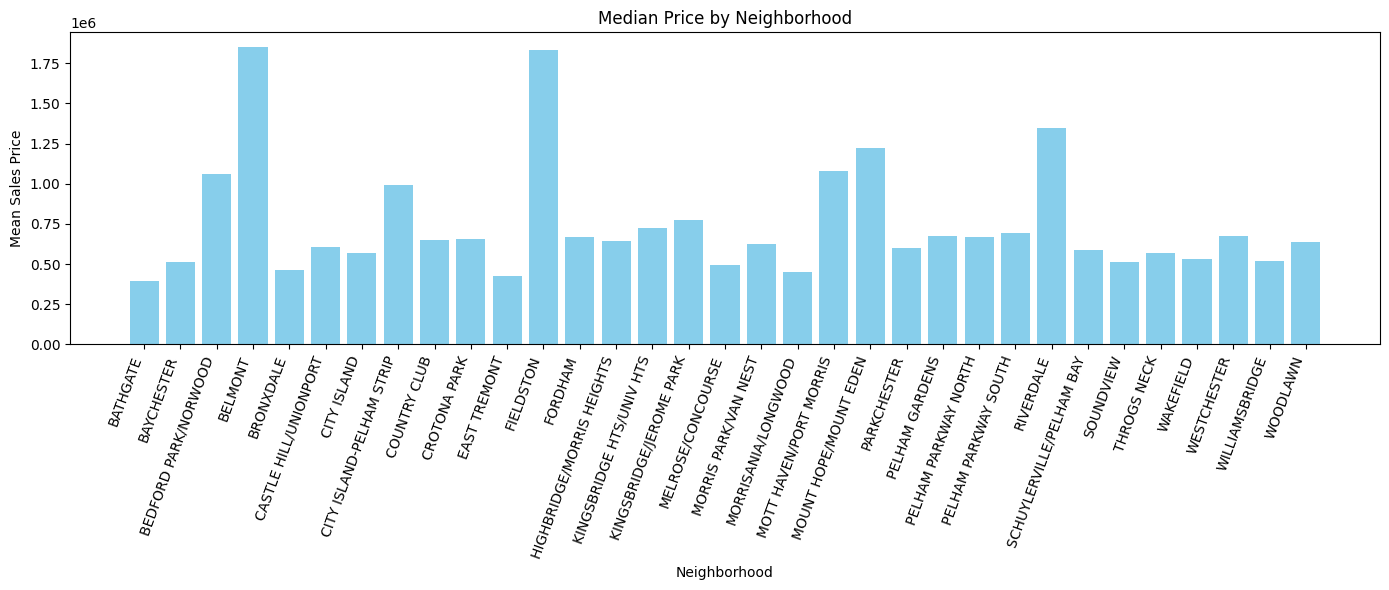

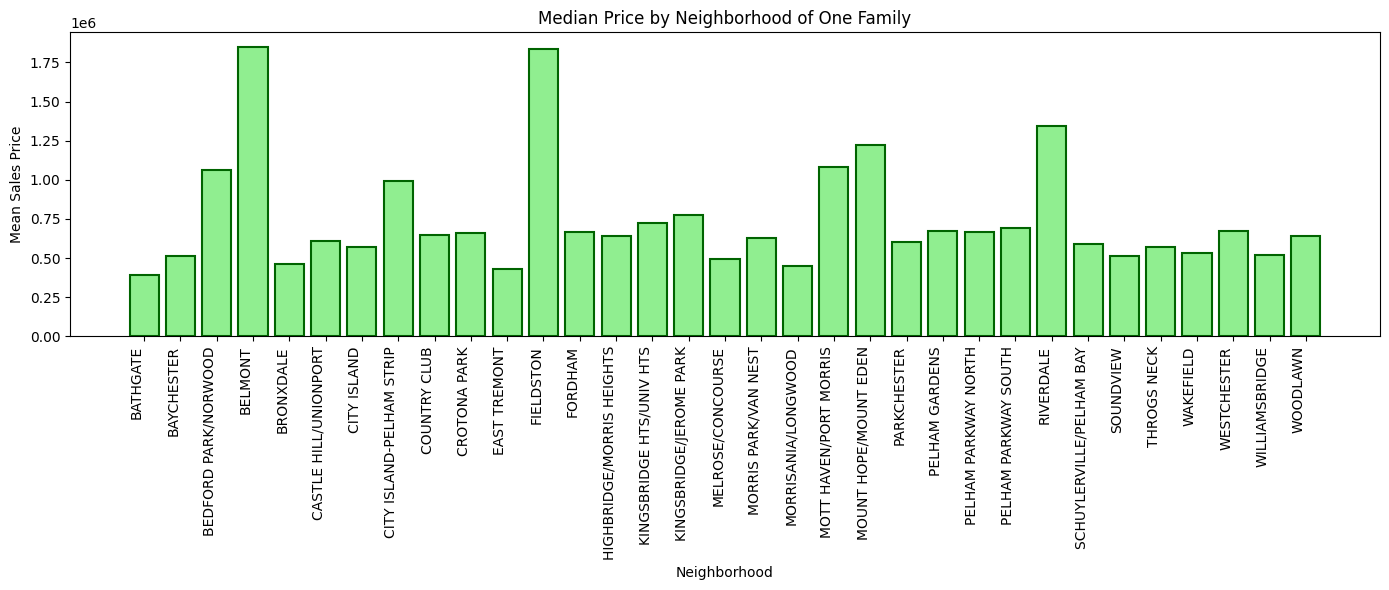

In [44]:
#bar plot of the mean sale price for each neighborhood
plt.figure(figsize=(14, 6))
plt.bar(one_fam_stats['Neighborhood'], one_fam_stats['mean'], color='skyblue')

# Customizing the plot
plt.title('Median Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Sales Price')
plt.xticks(rotation=70, ha='right')  # Rotate x-axis labels to 70 degrees rotation
plt.tight_layout()

# Show the plot
plt.show()



# bar plot of the mean sale price for each neighborhood with change color and color around the bars

plt.figure(figsize=(14, 6))
plt.bar(
    one_fam_stats['Neighborhood'],
    one_fam_stats['mean'],
    #change of color
    color='lightgreen',
    edgecolor='darkgreen',
  # Change of line width
    linewidth=1.5
)

# Customizing the plot with changes
plt.title('Median Price by Neighborhood of One Family')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Sales Price')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels to 90 degrees rotation
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
# Filter for Two Family Homes
two_family_df = bronx_props_2023[bronx_props_2023['Building Class'].str.contains('Two Family', case=False, na=False)]

# View the filtered DataFrame
print(two_family_df)

# Stats for Two Family (building class)

two_fam_stats = two_family_df.groupby('Neighborhood')['Sale Price'].agg(['mean', 'min', 'max']).reset_index()

# View the grouped statistics
print(two_fam_stats)

     Neighborhood Building Class Gross Sq Feet  Year Built  Sale Price  \
8        BATHGATE    two family          2,394      1994.0      820000   
9        BATHGATE    two family          2,394      1995.0      815000   
6        BATHGATE    two family          2,400      1993.0      763000   
7        BATHGATE    two family          2,400      1993.0      750000   
10       BATHGATE    two family          2,340      1998.0      750000   
...           ...            ...           ...         ...         ...   
5857     WOODLAWN    two family          1,640      1925.0      775000   
5859     WOODLAWN    two family          2,415      1915.0      728000   
5862     WOODLAWN    two family          2,112      1925.0      670000   
5870     WOODLAWN    two family          2,601      1970.0      615000   
5868     WOODLAWN    two family          2,092      1915.0      574000   

     Sale Date  
8      11/2023  
9      06/2023  
6      09/2023  
7      05/2023  
10     07/2023  
...      

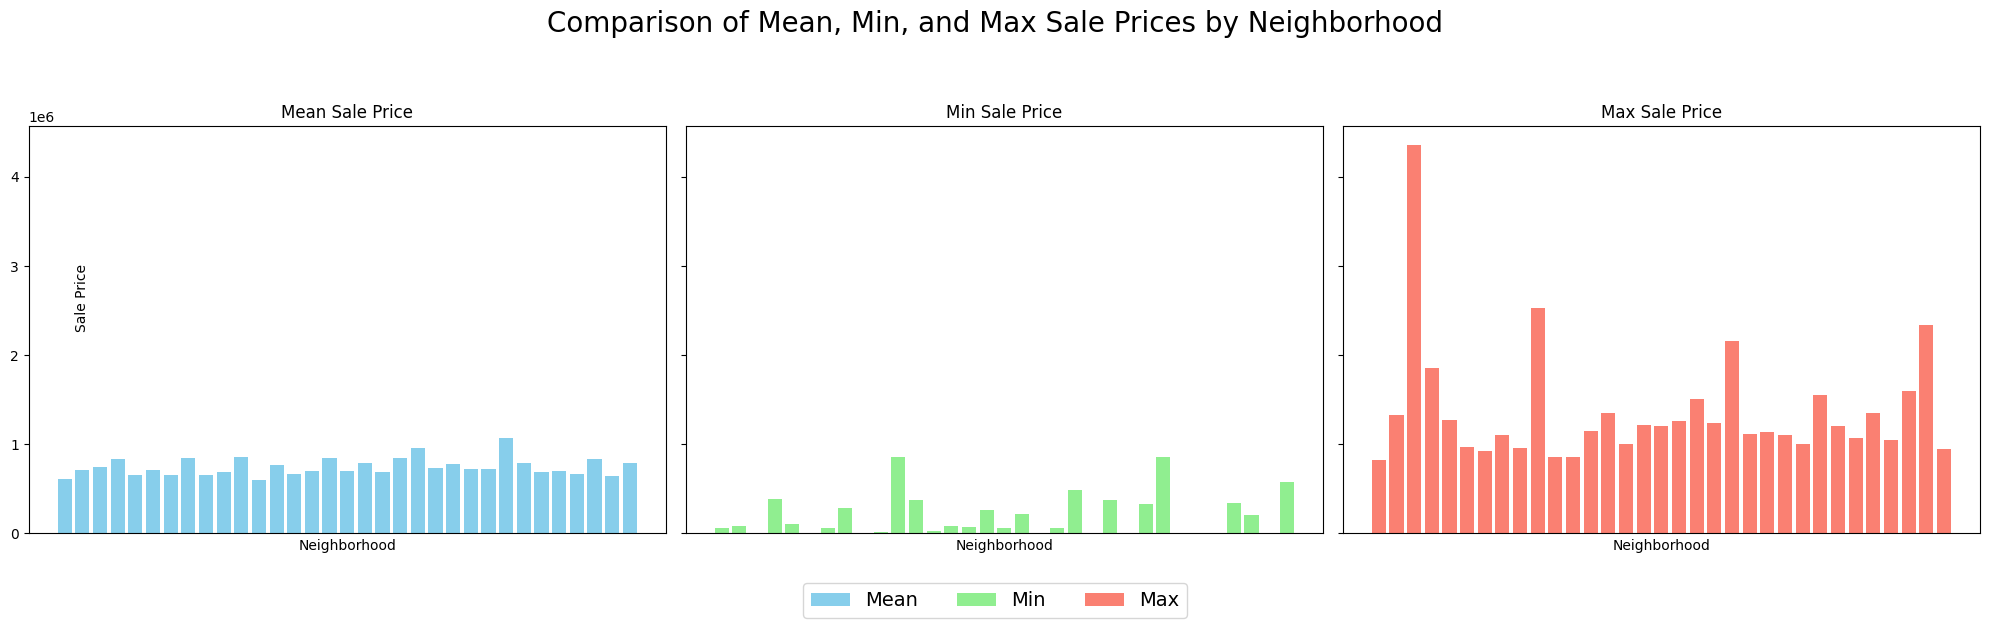

In [46]:


# Creating subplots using mathplotlib
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plotting mean, min, and max sale prices for each Neighborhood
axes[0].bar(two_fam_stats['Neighborhood'], two_fam_stats['mean'], color='skyblue', label='Mean')
axes[0].set_title('Mean Sale Price')
axes[0].set_xlabel('Neighborhood')
axes[0].set_xticks([])

axes[1].bar(two_fam_stats['Neighborhood'], two_fam_stats['min'], color='lightgreen', label='Min')
axes[1].set_title('Min Sale Price')
axes[1].set_xlabel('Neighborhood')
axes[1].set_xticks([])

axes[2].bar(two_fam_stats['Neighborhood'], two_fam_stats['max'], color='salmon', label='Max')
axes[2].set_title('Max Sale Price')
axes[2].set_xlabel('Neighborhood')
axes[2].set_xticks([])

# Setting common ylabel
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation='vertical')

# Creating a single legend for all subplots
handles, labels = [], []
for ax in axes:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

# title for the subplots and with font size
fig.suptitle('Comparison of Mean, Min, and Max Sale Prices by Neighborhood', fontsize=20)

# Adjusting fontsize of legend, made legend location lower center, and adjusted for the legend to not overlap plots.
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=14 , bbox_to_anchor=(0.5, -0.05))

# Adjusting layout
#Space for the title and the legend
plt.tight_layout(rect=[0, 0.05, 1, 0.92])

# Show the plot
plt.show()


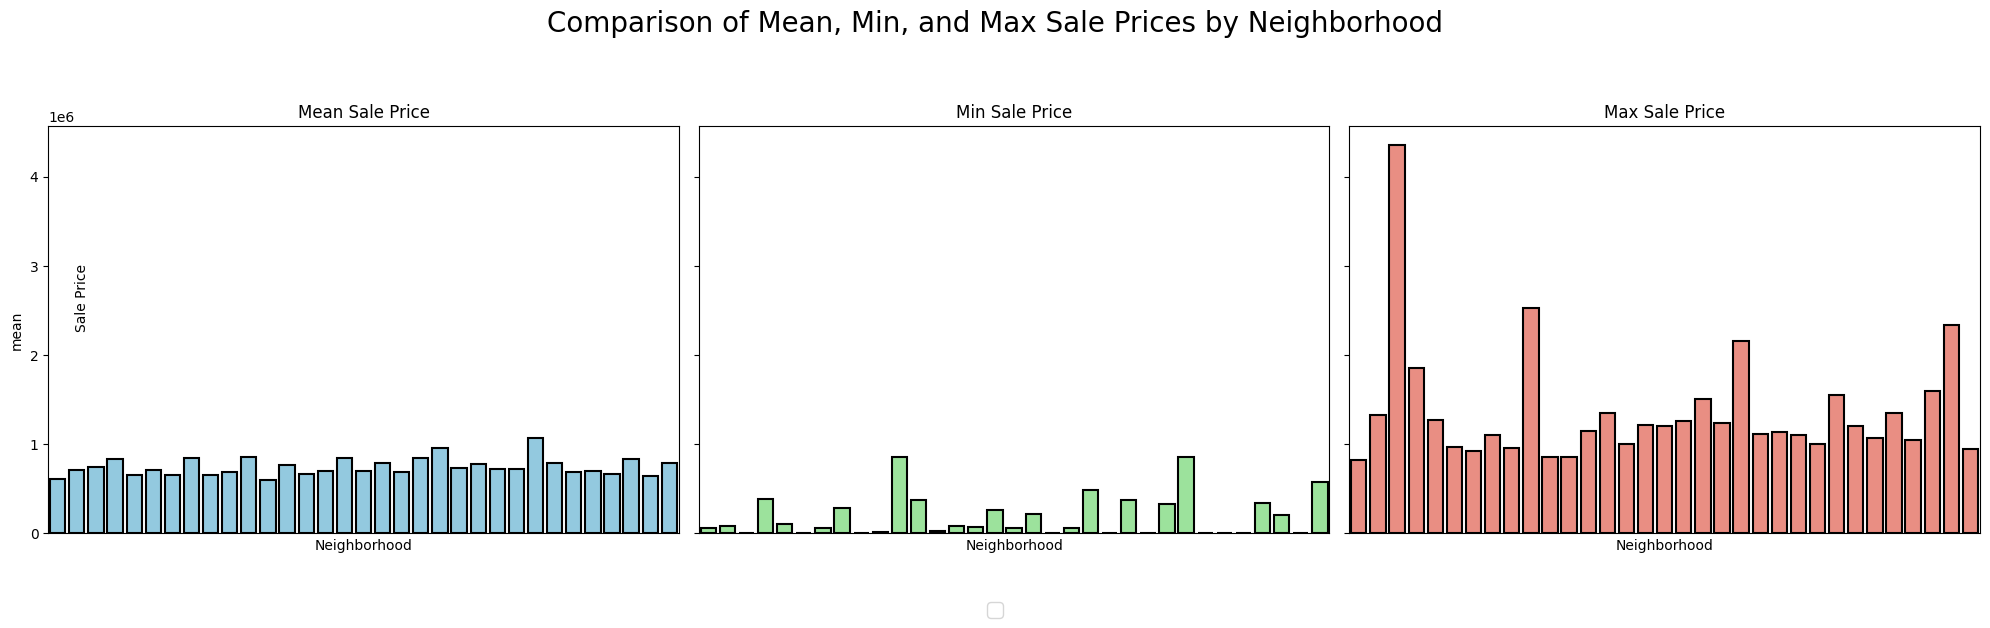

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plotting mean sale price using Seaborn
sns.barplot(
    x='Neighborhood',
    y='mean',
    data=two_fam_stats,
    ax=axes[0],
    color='skyblue',
    edgecolor='black',  # Edge color for the bars
    linewidth=1.5       # Line width for the edge
)
axes[0].set_title('Mean Sale Price')
axes[0].set_xlabel('Neighborhood')
axes[0].set_xticks([])

# Plotting min sale price using Seaborn
sns.barplot(
    x='Neighborhood',
    y='min',
    data=two_fam_stats,
    ax=axes[1],
    color='lightgreen',
    edgecolor='black',
    linewidth=1.5
)
axes[1].set_title('Min Sale Price')
axes[1].set_xlabel('Neighborhood')
axes[1].set_xticks([])

# Plotting max sale price using Seaborn
sns.barplot(
    x='Neighborhood',
    y='max',
    data=two_fam_stats,
    ax=axes[2],
    color='salmon',
    edgecolor='black',
    linewidth=1.5
)
axes[2].set_title('Max Sale Price')
axes[2].set_xlabel('Neighborhood')
axes[2].set_xticks([])

# common ylabel
fig.text(0.04, 0.5, 'Sale Price', va='center', rotation='vertical')

# title for the entire figure
fig.suptitle('Comparison of Mean, Min, and Max Sale Prices by Neighborhood', fontsize=20)

#  single legend for all subplots with a larger font size and position it at the bottom center
handles, labels = [], []
for ax in axes:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:  # Prevent duplicate labels
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=14, bbox_to_anchor=(0.5, -0.05))

# Adjusting layout to ensure space for the title and legend
plt.tight_layout(rect=[0, 0.05, 1, 0.92])

# Show the plot
plt.show()





<ipython-input-48-11bf48944cc3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


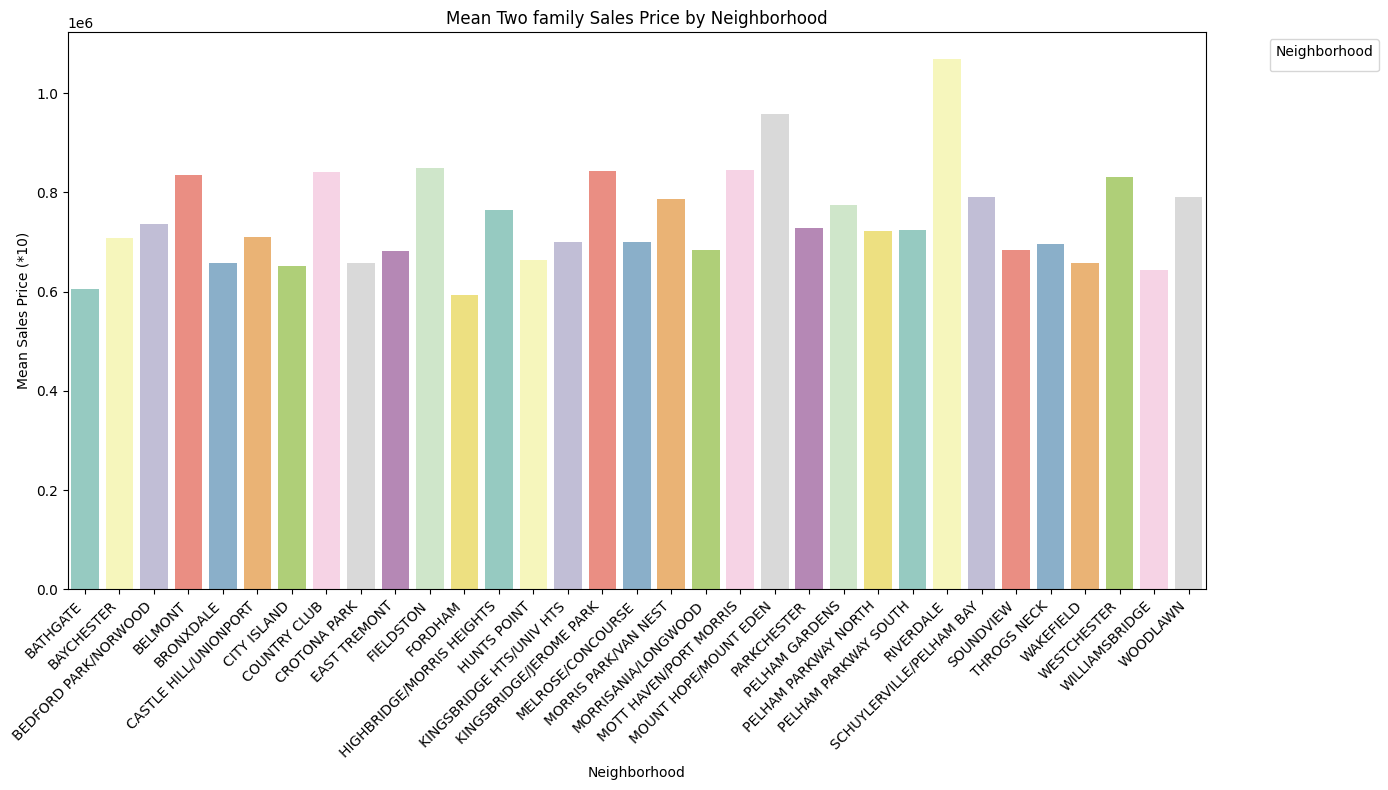

In [48]:
# bar plot with colors for two fam stats using Seborn

import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for 'two_fam_stats' with customized colors and legend
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    x='Neighborhood',
    y='mean',
    data=two_fam_stats,
    palette='Set3'
)

# Customizing the plot
plt.title('Mean Two family Sales Price by Neighborhood')
plt.xlabel('Neighborhood') #x-label
plt.ylabel('Mean Sales Price (*10)') #y-label
plt.xticks(rotation=45, ha='right')

# plot legend
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


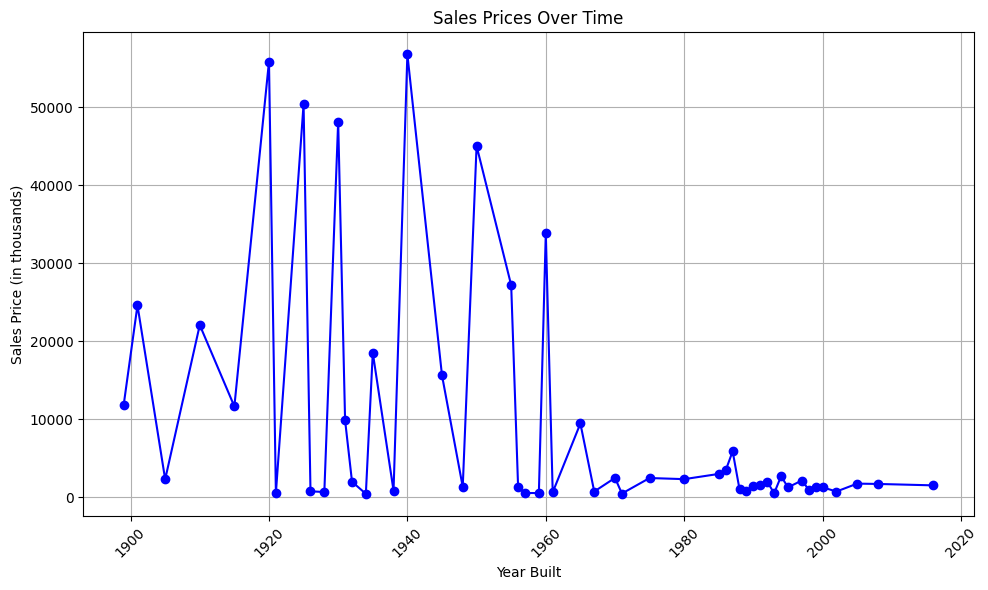

In [49]:
'''
Analysis Based on Year Built - Using One Family Homes Data

Using one family homes data frame. We will determine if the year the home was built play a role in the home sales prices.

Does the year the house was built play a role in Housing Sale Prices ?
'''

import matplotlib.pyplot as plt

# Group by Year built and calculate total Sale Price
 # Group your dataset by two columns and then sort the aggregated results within the groups.

price_by_year = one_family_df.groupby('Year Built')['Sale Price'].sum().reset_index()
price_by_year.rename(columns={'Sale Price': 'total_price1'}, inplace=True)


# Scatter Plotting using mathplotlib
plt.figure(figsize=(10, 6))
plt.plot(price_by_year['Year Built'], price_by_year['total_price1'] / 1000, color='blue', marker='o', linestyle='-')
plt.xlabel('Year Built')
plt.ylabel('Sales Price (in thousands)') #y-label
plt.title('Sales Prices Over Time') #title
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [50]:

# Group multiple columns and make new columns from results
price_by_year_stats = one_family_df.groupby('Year Built')['Sale Price'].agg(
    total_price1='sum',
    count_sales='count',
    mean_price='mean',
    median_price='median',
    min_price='min',
    max_price='max',
    std_dev_price='std'
).reset_index()

# Sort the results by Year Built
price_by_year_stats.sort_values(by='Year Built', inplace=True)

# Print the summary DataFrame
print(price_by_year_stats)


    Year Built  total_price1  count_sales    mean_price  median_price  \
0       1899.0      11800371           16  7.375232e+05      535000.0   
1       1901.0      24612900           29  8.487207e+05      700000.0   
2       1905.0       2300000            2  1.150000e+06     1150000.0   
3       1910.0      22082900           34  6.494971e+05      551500.0   
4       1915.0      11651000           17  6.853529e+05      625000.0   
5       1920.0      55859449           92  6.071679e+05      601500.0   
6       1921.0        520000            1  5.200000e+05      520000.0   
7       1925.0      50404868           83  6.072876e+05      575000.0   
8       1926.0        765000            1  7.650000e+05      765000.0   
9       1928.0        675000            1  6.750000e+05      675000.0   
10      1930.0      48178400           67  7.190806e+05      618000.0   
11      1931.0       9854000            7  1.407714e+06      665000.0   
12      1932.0       1996000            4  4.990000

In [51]:
#  Conclusion

'''
The Bronx real estate market shows significant variability in property prices across different neighborhoods.
High-end areas like Belmont and Bedford Park/Norwood feature mean prices of around $1.85 million and $1.06 million, respectively,
 while more affordable neighborhoods such as Bathgate and Baychester have mean prices closer to $392,500 and $511,298.
 The maximum prices for properties in these neighborhoods highlight potential for investment returns, with values reaching up to
  $4.35 million in Belmont. This wide range indicates diverse options for buyers, from luxury investments to more budget-friendly purchases.

In the two-family home market, mean prices range from approximately $605,200 in Bathgate to over $1 million in Riverdale,
suggesting a consistent valuation for these properties across various neighborhoods. The age of homes also influences pricing,
 with properties built in the early 1900s typically commanding higher prices. This trend points to potential investment opportunities in less expensive
 areas like East Tremont and Soundview, which may see increasing demand over time.
 Overall, the Bronx offers a dynamic real estate landscape with both challenges and opportunities for buyers and investors.

 '''

'\nThe Bronx real estate market shows significant variability in property prices across different neighborhoods.\nHigh-end areas like Belmont and Bedford Park/Norwood feature mean prices of around $1.85 million and $1.06 million, respectively,\n while more affordable neighborhoods such as Bathgate and Baychester have mean prices closer to $392,500 and $511,298.\n The maximum prices for properties in these neighborhoods highlight potential for investment returns, with values reaching up to\n  $4.35 million in Belmont. This wide range indicates diverse options for buyers, from luxury investments to more budget-friendly purchases.\n\nIn the two-family home market, mean prices range from approximately $605,200 in Bathgate to over $1 million in Riverdale,\nsuggesting a consistent valuation for these properties across various neighborhoods. The age of homes also influences pricing,\n with properties built in the early 1900s typically commanding higher prices. This trend points to potential i